In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf

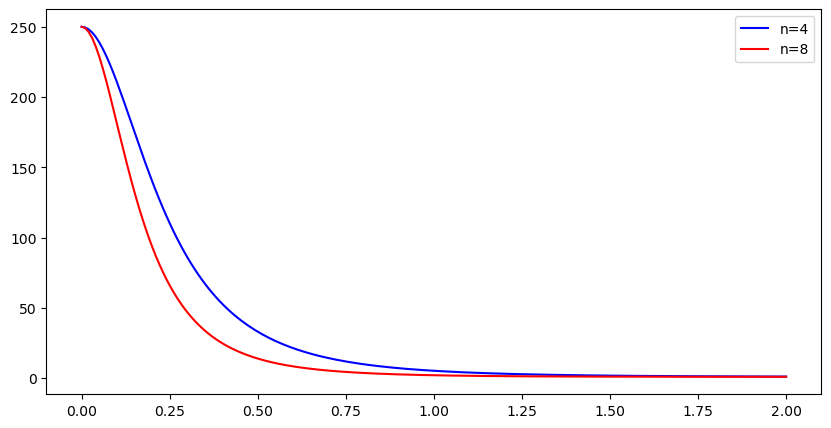

5.265138931180101
1.150702444729282
2.082609010933147
1.002736375430795


In [7]:
alpha=1/250
delta_piccolo=np.linspace(0,2,200)
k_aplha=stats.norm.ppf(1-alpha/2)
n1=4#blu (mi aspetto ARL maggiore, ossia aspetto di più per detectare OOC)
n2=8 #red (mi aspetto ARL minore, ossia aspetto di meno per detectare OOC)
beta1=stats.norm.cdf(k_aplha-delta_piccolo*np.sqrt(n1))-stats.norm.cdf(-k_aplha-delta_piccolo*np.sqrt(n1))
ARL1=1/(1-beta1)
beta2=stats.norm.cdf(k_aplha-delta_piccolo*np.sqrt(n2))-stats.norm.cdf(-k_aplha-delta_piccolo*np.sqrt(n2))
ARL2=1/(1-beta2)
plt.figure(figsize=(10, 5))
plt.plot(delta_piccolo,ARL1,label='n=4',color='blue')
plt.plot(delta_piccolo,ARL2,label='n=8',color='red')
plt.legend()
plt.show()

beta=stats.norm.cdf(k_aplha-1*np.sqrt(n1))-stats.norm.cdf(-k_aplha-1*np.sqrt(n1))
print(1/(1-beta))
beta=stats.norm.cdf(k_aplha-2*np.sqrt(n1))-stats.norm.cdf(-k_aplha-2*np.sqrt(n1))
print(1/(1-beta))

beta=stats.norm.cdf(k_aplha-1*np.sqrt(n2))-stats.norm.cdf(-k_aplha-1*np.sqrt(n2))
print(1/(1-beta))
beta=stats.norm.cdf(k_aplha-2*np.sqrt(n2))-stats.norm.cdf(-k_aplha-2*np.sqrt(n2))
print(1/(1-beta))

#con n=8 (rossa) ho un average run length minore! ossia aspetto di meno a detectare OOC :)

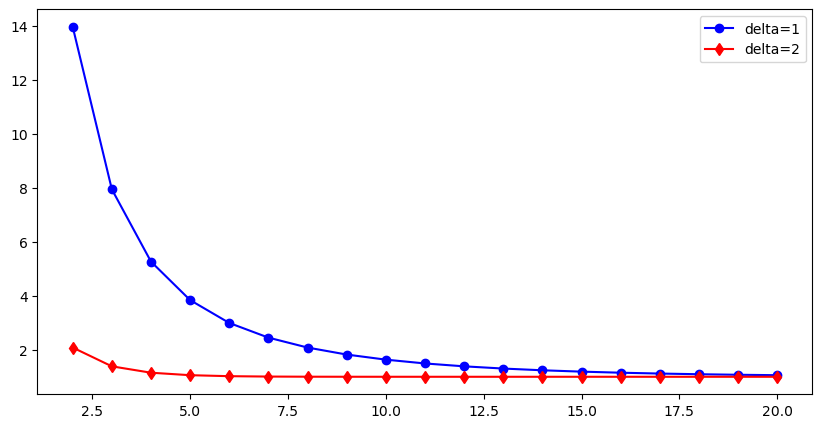

7.944285845882698
2.9932858699783775
1.3868816848191627
1.0221283818906166


In [11]:
alpha=1/250
n=np.arange(2,21,1)
k_aplha=stats.norm.ppf(1-alpha/2)
delta1=1 #ARL più alta, blue
delta2=2 #ARL più bassa, red
beta1=stats.norm.cdf(k_aplha-delta1*np.sqrt(n))-stats.norm.cdf(-k_aplha-delta1*np.sqrt(n))
ARL1=1/(1-beta1)
beta2=stats.norm.cdf(k_aplha-delta2*np.sqrt(n))-stats.norm.cdf(-k_aplha-delta2*np.sqrt(n))
ARL2=1/(1-beta2)
plt.figure(figsize=(10, 5))
plt.plot(n,ARL1,label='delta=1',color='blue',marker='o')
plt.plot(n,ARL2,label='delta=2',color='red',marker='d')
plt.legend()
plt.show()

#ARL è più basso in generale nella curva rossa (ossia quando la delta da detectare è più alta)

beta=stats.norm.cdf(k_aplha-delta1*np.sqrt(3))-stats.norm.cdf(-k_aplha-delta1*np.sqrt(3))
print(1/(1-beta))
beta=stats.norm.cdf(k_aplha-delta1*np.sqrt(6))-stats.norm.cdf(-k_aplha-delta1*np.sqrt(6))
print(1/(1-beta))

beta=stats.norm.cdf(k_aplha-delta2*np.sqrt(3))-stats.norm.cdf(-k_aplha-delta2*np.sqrt(3))
print(1/(1-beta))
beta=stats.norm.cdf(k_aplha-delta2*np.sqrt(6))-stats.norm.cdf(-k_aplha-delta2*np.sqrt(6))
print(1/(1-beta))

The head of the quality control department is interested in selecting an optimal sample size 𝑛 to minimize 
the lack of quality costs in the presence of a mean shift equal to 𝛿 = 2 standard deviation units. Knowing 
that samples are gathered every 4 hours, the cost of planarity measurements for each laminate is 𝐶1 = 2 € 
and an extra cost equal to 𝐶2 = 15 € is due for each hour spent in the out-of-control state, determine the 
optimal sample size that minimizes the overall expected costs (assume the cost of the process in its in
control state as a reference baseline). Discuss the results.   

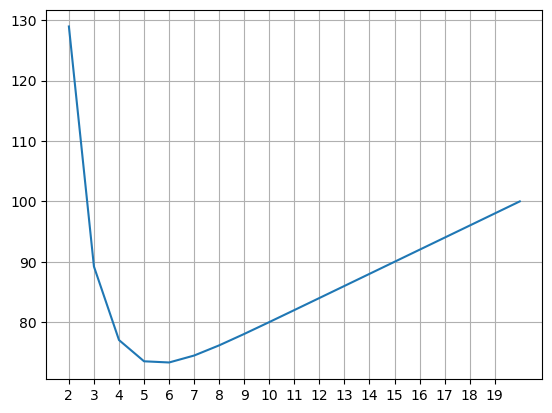

In [14]:
T=4
C=2*n+15*ARL2*T
plt.plot(n,C)
plt.xticks(range(2, 20))
plt.grid()
plt.show()